# Ejercicio Covid-19

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Preparación general de datos

In [2]:
# Datos https://github.com/CSSEGISandData/COVID-19.git
data = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv" )
data.sample(3)

#Saco un dataset con solo los países
data_countries = data.groupby("Country/Region", as_index=False).sum()
#Se ve que están todos y comprobado que suma
data_countries[::]

# Hago transposición de los datos para mover las columnas en filas 
data_trans = data_countries.set_index('Country/Region').transpose()
# Y me quedo sólo con los datos temporales y número de casos
data_time = data_trans[2:]
data_time.tail()

# Cogemos solo determinados países
data_time = data_time[['China', 'France', 'Germany', 'Iran','Italy', 'Korea, South', 'Norway','Spain', 'US', 'United Kingdom']]

#Hago listado de Countries
list_countries = data_time.columns
list_countries

# Para coger los países que en día 20 tienen más de 1000 casos: data_countries = data_countries[data_countries["3/17/20"] >= 1000 ]
data_time.tail(2)

#Convierto la columna fecha en datetime
from datetime import date
data_time.index = pd.to_datetime(data_time.index)
data_time.tail()


Country/Region,China,France,Germany,Iran,Italy,"Korea, South",Norway,Spain,US,United Kingdom
2020-03-22,81435.0,16243.0,24873.0,21638.0,59138.0,8961.0,2385.0,28768.0,33276.0,5745.0
2020-03-23,81498.0,20123.0,29056.0,23049.0,63927.0,8961.0,2621.0,35136.0,43847.0,6726.0
2020-03-24,81591.0,22622.0,32986.0,24811.0,69176.0,9037.0,2863.0,39885.0,53740.0,8164.0
2020-03-25,81661.0,25600.0,37323.0,27017.0,74386.0,9137.0,3084.0,49515.0,65778.0,9640.0
2020-03-26,81782.0,29551.0,43938.0,29406.0,80589.0,9241.0,3369.0,57786.0,83836.0,11812.0


## Gráfico + CSV : covid19_data_drive_from100.csv

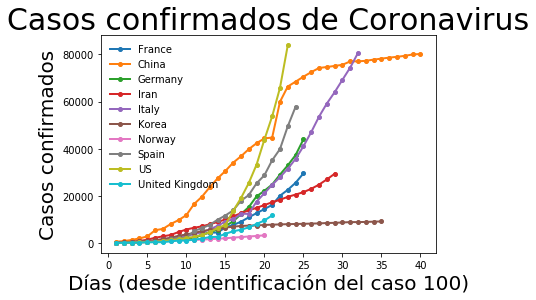

,France,China,Germany,Iran,Italy,"Korea, South",Norway,Spain,US,United Kingdom
36,NaN,78600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,78928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,79356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,79932.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,80136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
'''Vamos a hacer un gráfico para ver los casos confirmados (desde caso 100)'''

# Rellenar los valores menores de 100 por null
# PROBAR: https://stackoverflow.com/questions/46168450/replace-a-specific-range-of-values-in-a-pandas-dataframe
# data_drive_from100cases = data_time.mask(data_time < 100, 'null')
# data_drive_from100cases.head(2)

# Rellenar los valores menores de 100 por null
# PROBAR: https://stackoverflow.com/questions/46168450/replace-a-specific-range-of-values-in-a-pandas-dataframe
# data_drive_from100cases = data_time.mask(data_time < 100, 'null')
# data_drive_from100cases.head(2)

# Coger solo datos del último mes
data_time_30days = data_time[-200:]
# Si quiero quitar China: data_time_filter = data_time_filter.drop('China', axis=1)
data_time_30days.tail(2)

#Exporto los datos en diferentes arhcivos con casa país
for country in list_countries:
    dataX = data_time_30days[country]
    dataX = dataX[dataX > 100]
    dataX.to_csv('data_' + country + ".csv", index=False, header= country)

#Lista dataframes
dataframes_list = ['dataframe_France', 'dataframe_China', 'dataframe_Germany', 'dataframe_Iran', 'dataframe_Italy', 'dataframe_Korea', 'dataframe_Norway', 'dataframe_Spain', 'dataframe_US', 'dataframe_UnitedKingdom']
dataframes_list[1]

# Creamos los CSV
dataframe_France = pd.read_csv('data_France.csv')
dataframe_China = pd.read_csv('data_China.csv')
dataframe_Germany = pd.read_csv('data_Germany.csv')
dataframe_Iran = pd.read_csv('data_Iran.csv')
dataframe_Italy = pd.read_csv('data_Italy.csv')
dataframe_Korea = pd.read_csv('data_Korea, South.csv')
dataframe_Norway = pd.read_csv('data_Norway.csv')
dataframe_Spain = pd.read_csv('data_Spain.csv')
dataframe_US = pd.read_csv('data_US.csv')
dataframe_UnitedKingdom = pd.read_csv('data_United Kingdom.csv')

#Les añadimos NaN al final y reindexamos
new_index = np.arange(1,41)
dataframe_France = dataframe_France.reindex(new_index)
dataframe_China = dataframe_China.reindex(new_index)
dataframe_Germany = dataframe_Germany.reindex(new_index)
dataframe_Iran = dataframe_Iran.reindex(new_index)
dataframe_Italy = dataframe_Italy.reindex(new_index)
dataframe_Korea = dataframe_Korea.reindex(new_index)
dataframe_Norway = dataframe_Norway.reindex(new_index)
dataframe_Spain = dataframe_Spain.reindex(new_index)
dataframe_US = dataframe_US.reindex(new_index)
dataframe_UnitedKingdom = dataframe_UnitedKingdom.reindex(new_index)

# Lo ploteo
plt.plot(dataframe_France, label='France', marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_China, label='China',marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Germany, label='Germany' ,marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Iran, label='Iran',marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Italy, label='Italy',marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Korea, label='Korea' ,marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Norway, label='Norway' ,marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Spain, label='Spain' ,marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_US, label='US' ,marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_UnitedKingdom, label='United Kingdom',marker='o', markersize=4, linewidth=2)

plt.legend(loc='upper left', frameon=False, fancybox=True)
plt.title('Casos confirmados de Coronavirus', {'fontsize': 30})

plt.xlabel("Días (desde identificación del caso 100)", {'fontsize': 20})
plt.ylabel("Casos confirmados", {'fontsize': 20})
plt.show()

#Juntar dataframes y Exportar CSV completo
data_drive_from100cases = dataframe_France.join([dataframe_China, dataframe_Germany, dataframe_Iran, dataframe_Italy, dataframe_Korea, dataframe_Norway, dataframe_Spain, dataframe_US,dataframe_UnitedKingdom])
data_drive_from100cases.to_csv('covid19_data_drive_from100.csv', sep = ';')
data_drive_from100cases.tail()

## Gráfico + CSV covid19_data_drive_days.csv

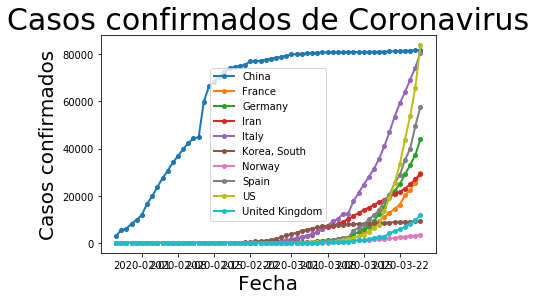

Country/Region,China,France,Germany,Iran,Italy,"Korea, South",Norway,Spain,US,United Kingdom
2020-03-22,81435.0,16243.0,24873.0,21638.0,59138.0,8961.0,2385.0,28768.0,33276.0,5745.0
2020-03-23,81498.0,20123.0,29056.0,23049.0,63927.0,8961.0,2621.0,35136.0,43847.0,6726.0
2020-03-24,81591.0,22622.0,32986.0,24811.0,69176.0,9037.0,2863.0,39885.0,53740.0,8164.0
2020-03-25,81661.0,25600.0,37323.0,27017.0,74386.0,9137.0,3084.0,49515.0,65778.0,9640.0
2020-03-26,81782.0,29551.0,43938.0,29406.0,80589.0,9241.0,3369.0,57786.0,83836.0,11812.0


In [13]:
# Coger solo datos de últimos 60 días
data_time_Xdays = data_time[-60:]
# Si quiero quitar China: data_time_filter = data_time_filter.drop('China', axis=1)
data_time_Xdays.tail(2)

'''Vamos a hacer un gráfico para ver los casos confirmados por fechas'''
plt.plot(data_time_Xdays, label='France', marker='o', markersize=4, linewidth=2)
plt.title('Casos confirmados de Coronavirus', {'fontsize': 30})
plt.xlabel("Fecha", {'fontsize': 20})
plt.ylabel("Casos confirmados", {'fontsize': 20})
plt.legend(list_countries)

plt.show()

#Exportar CSV por días progresivos
data_drive_lastX = data_time_Xdays.loc[:,list_countries]
data_drive_lastX.to_csv('covid19_data_drive_days.csv', sep = ';', encoding="utf-8")
data_drive_lastX.tail()


## Preparación de datos CCAA

In [8]:
# Coger datos de España
# Data: https://github.com/michydev/Covid-19-Spain-API
import pandas as pd
data_ccaa = pd.read_json (r'https://api.chollx.es/coronavirus/ca', encoding= 'utf-8')
print(data_ccaa.columns)
data_ccaa.head(20)
data_ccaa.set_index(["ccaa"], inplace = True, append = False, drop = True)

date_today = data_ccaa.iloc[19,6]
date_today = date_today[:5]
date_today

Index(['ccaa', 'casos_totales', 'hospitalizados', 'casos_graves', 'fallecidos',
       'curados', 'nuevos_respecto_ayer', 'ultima_actualización'],
      dtype='object')


'28/03'

In [7]:
int(str(data_ccaa.iloc[19, 6].[:2])

SyntaxError: invalid syntax (<ipython-input-7-6781de98ba8f>, line 1)

### Evolución por comunidad autónoma

In [6]:
data_process = pd.read_csv("covid19_spain_ccaa_evolution.csv", sep = ';', encoding="utf-8")
data_process

,Comunidades Autónomas,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,...,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26
0,Andalucía,0,0,0,1,6,6,6,12,13,...,683,859,1008,1287,1515,1725,1961,2471,3010,3406
1,Aragón,0,0,0,0,2,2,2,2,2,...,207,226,281,360,424,532,638,758,907,1116
2,Asturias,0,0,0,0,0,0,0,1,1,...,193,242,292,344,486,545,594,662,779,841
3,Baleares,1,1,1,2,2,2,2,2,2,...,92,112,169,203,246,331,400,478,562,660
4,Canarias,5,5,5,6,6,6,6,7,7,...,148,181,220,287,348,414,481,557,657,784
5,Cantabria,0,0,0,0,0,0,0,10,10,...,58,68,83,144,215,282,347,425,510,671
6,Castilla La Mancha,0,0,0,0,0,0,0,3,7,...,567,675,801,1044,1423,1819,2078,2465,2780,3383
7,Castilla y León,0,0,0,0,2,2,2,3,5,...,431,668,868,1147,1466,1744,2055,2460,2940,3488
8,Cataluña,1,1,1,2,3,3,3,15,15,...,1394,1866,2702,3270,4203,4704,5925,7864,9937,11592
9,Ceuta,0,0,0,0,0,0,0,0,0,...,1,1,1,5,5,5,6,6,9,10


In [304]:
data_ccaa_evolution_last.name

'2020-03-26'

In [312]:
list2 = data_process.columns.get_values()
print(list2)

[';2020-02-24;2020-02-25;2020-02-26;2020-02-27;2020-02-28;2020-02-29;2020-03-01;2020-03-02;2020-03-03;2020-03-04;2020-03-05;2020-03-06;2020-03-07;2020-03-08;2020-03-09;2020-03-10;2020-03-11;2020-03-12;2020-03-13;2020-03-14;2020-03-15;2020-03-16;2020-03-17;2020-03-18;2020-03-19;2020-03-20;2020-03-21;2020-03-22;2020-03-23;2020-03-24;2020-03-25;2020-03-26']


In [317]:
# funciona para la revisión de si la columna ya está metida
for column in data_process.columns:
    if column == data_ccaa_evolution_last.name:
        print('Ya está')
    else:
        print('No hay iguales')

No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
No hay iguales
Ya está


In [19]:
# Original dataset: https://github.com/AlbertoCasasOrtiz/Coronavirus-Spain-Dataset
# Saco la última columna del dataframe habitual y sustituir símbolos apra igualar fecha
from datetime import datetime
date_today_evolution = date_today_brut[:8]
date_today_evolution_final = str(pd.Timestamp(date_today_evolution))
date_today_evolution_final = date_today_evolution_final[:10]

list_ccaa = ['Andalucía','Aragón',           'Asturias',
                 'Baleares',           'Canarias',          'Cantabria',
       'Castilla La Mancha',    'Castilla y León',           'Cataluña',
                    'Ceuta',      'C. Valenciana',        'Extremadura',
                  'Galicia',             'Madrid',            'Melilla',
                   'Murcia',            'Navarra',         'País Vasco',
                 'La Rioja']

# Importo los datos y reindexo
data_ccaa_evolution_last = pd.read_json (r'https://api.chollx.es/coronavirus/ca', encoding= 'utf-8')
data_ccaa_evolution_last.set_index(["ccaa"], inplace = True, append = False, drop = True)

# Renombro la columna con la fecha
data_ccaa_evolution_last.rename(columns = {'casos_totales':date_today_evolution_final}, inplace = True) 
data_ccaa_evolution_last = data_ccaa_evolution_last[date_today_evolution_final]
data_ccaa_evolution_last.head()


ccaa
Andalucía    3406
Aragón       1116
Asturias      841
Baleares      660
Canarias      784
Name: 2020-03-27, dtype: int64

In [376]:
# FALTA METER EL LOOP PARA EL MERGE!!!!!

# Cargo dataset
data_process = pd.read_csv("covid19_spain_ccaa_evolution.csv", sep = ';', encoding="utf-8") 

# Hago merge
data_process_final = pd.merge(data_process,data_ccaa_evolution_last)

#Añado index nuevo
data_process_final['Comunidades Autónomas'] = list_ccaa
data_process_final.set_index('Comunidades Autónomas', inplace=True)

#Quito columna sobrante
data_process_final.to_csv('covid19_spain_ccaa_evolution2.csv', sep = ';', encoding="utf-8")
data_process_final

,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,...,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26
Comunidades Autónomas,,,,,,,,,,,,,,,,,,,,,
Andalucía,0,0,0,1,6,6,6,12,13,13,...,683,859,1008,1287,1515,1725,1961,2471,3010,3406
Aragón,0,0,0,0,2,2,2,2,2,2,...,207,226,281,360,424,532,638,758,907,1116
Asturias,0,0,0,0,0,0,0,1,1,2,...,193,242,292,344,486,545,594,662,779,841
Baleares,1,1,1,2,2,2,2,2,2,5,...,92,112,169,203,246,331,400,478,562,660
Canarias,5,5,5,6,6,6,6,7,7,7,...,148,181,220,287,348,414,481,557,657,784
Cantabria,0,0,0,0,0,0,0,10,10,10,...,58,68,83,144,215,282,347,425,510,671
Castilla La Mancha,0,0,0,0,0,0,0,3,7,12,...,567,675,801,1044,1423,1819,2078,2465,2780,3383
Castilla y León,0,0,0,0,2,2,2,3,5,11,...,431,668,868,1147,1466,1744,2055,2460,2940,3488
Cataluña,1,1,1,2,3,3,3,15,15,15,...,1394,1866,2702,3270,4203,4704,5925,7864,9937,11592


In [357]:
data_ccaa_evolution.head()

,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,...,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26
Comunidades Autónomas,,,,,,,,,,,,,,,,,,,,,
Andalucía,0,0,0,1,6,6,6,12,13,13,...,683,859,1008,1287,1515,1725,1961,2471,3010,3406
Aragón,0,0,0,0,2,2,2,2,2,2,...,207,226,281,360,424,532,638,758,907,1116
Asturias,0,0,0,0,0,0,0,1,1,2,...,193,242,292,344,486,545,594,662,779,841
Baleares,1,1,1,2,2,2,2,2,2,5,...,92,112,169,203,246,331,400,478,562,660
Canarias,5,5,5,6,6,6,6,7,7,7,...,148,181,220,287,348,414,481,557,657,784


In [365]:
''' SOLO HACER UNA VEZ

list_ccaa = ['Andalucía','Aragón',           'Asturias',
                 'Baleares',           'Canarias',          'Cantabria',
       'Castilla La Mancha',    'Castilla y León',           'Cataluña',
                    'Ceuta',      'C. Valenciana',        'Extremadura',
                  'Galicia',             'Madrid',            'Melilla',
                   'Murcia',            'Navarra',         'País Vasco',
                 'La Rioja']

data_ccaa_evolution = pd.read_csv("bruto_spain_ccaa.csv")
data_ccaa_evolution.drop(data_ccaa_evolution.tail(1).index, inplace=True)

# Hago el merge
data_final = pd.merge(data_ccaa_evolution,data_ccaa_evolution_last)

#Añado index nuevo
data_final['Comunidades Autónomas'] = list_ccaa
data_final.set_index('Comunidades Autónomas', inplace=True)

#Quito columna sobrante
data_final.drop(columns=["Comunidad aut??noma"], inplace=True)
data_final.head(2)

# Exportar a CSV nuevo final
data_final.to_csv('covid19_spain_ccaa_evolution.csv', sep = ';', encoding="utf-8")

'''

## Gráfico + CSV: covid19_spain_ccaa.csv

In [9]:
# Coger fecha del día
date_today_brut = data_ccaa.iloc[19,6]
date_today = date_today[:5]
print(date_today)

data_ccaa_general = data_ccaa.iloc[0:19]
data_ccaa_general = data_ccaa_general.loc[:, ['casos_totales', 'fallecidos','curados','nuevos_respecto_ayer']]
data_ccaa_general.rename(columns = {'CCAA':'Comunidades autónomas', 'casos_totales':'Casos totales' + ' - ' + date_today, 'fallecidos':'Fallecidos'+ ' - ' + date_today, 'nuevos_respecto_ayer':'Nuevos casos (24h)' + ' - ' + date_today, 'curados':'Curados' + ' - ' + date_today}, inplace = True)


data_ccaa_general.tail(3)
data_ccaa.iloc[19:]

28/03


,casos_totales,hospitalizados,casos_graves,fallecidos,curados,nuevos_respecto_ayer,ultima_actualización
ccaa,,,,,,,
NaN,64059,36293,4165,4858,9357,7871,28/03/2020 09:30:03


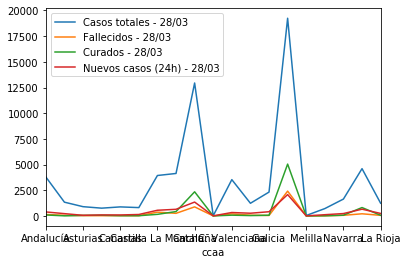

In [10]:
data_ccaa_general.to_csv('covid19_spain_ccaa.csv', sep = ';', encoding="utf-8")
data_ccaa_general.head()
data_ccaa_general.plot()
plt.show()

## Subir archivos a SERVIDOR desde FTP

In [11]:
import csv
from ftplib import FTP
from io import StringIO

In [12]:
# Ayuda: https://www.pythoncircle.com/post/668/uploading-a-file-to-ftp-server-using-python/
host = "akakicreations.com"
username = "info@socialdatascience.es"
password = "social44"

ftp = FTP(host=host)

login_status = ftp.login(user=username, passwd=password)
print(login_status)

print(ftp.dir())
fp = open("covid19_data_drive_days.csv", 'rb')
ftp.storbinary('STOR %s' % os.path.basename("covid19_data_drive_days.csv"), fp, 1024)
fp = open("covid19_data_drive_from100.csv", 'rb')
ftp.storbinary('STOR %s' % os.path.basename("covid19_data_drive_from100.csv"), fp, 1024)
fp = open("covid19_spain_ccaa.csv", 'rb')
ftp.storbinary('STOR %s' % os.path.basename("covid19_spain_ccaa.csv"), fp, 1024)
fp.close()


230-OK. Current restricted directory is /
230 6 Kbytes used (0%) - authorized: 51200 Kb
drwxr-xr-x    2 akakicre   akakicre         4096 Mar 25 15:57 .
drwxr-xr-x    2 akakicre   akakicre         4096 Mar 25 15:57 ..
-rw-------    1 akakicre   akakicre            7 Mar 27 09:05 .ftpquota
-rw-r--r--    1 akakicre   akakicre         4234 Mar 27 09:05 covid19_data_drive_days.csv
-rw-r--r--    1 akakicre   akakicre         2275 Mar 27 09:05 covid19_data_drive_from100.csv
-rw-r--r--    1 akakicre   akakicre          560 Mar 27 09:05 covid19_spain_ccaa.csv
None


In [ ]:
# https://www.atlantic.net/hipaa-compliant-cloud-storage/how-to-ftp-uploads-python/

'''Me quedé en:
- Diseñar en DataWrapper
- Subir a wordpress.

'''